# Practical Case: DBSCAN


### Description
The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
import math


## Auxiliar Functions 

In [2]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

## 1. Reading the Dataset

In [3]:
df = pd.read_csv("/Users/sergioperez/Desktop/Data/udemy ml/datasets/creditcard.csv")

## 2. Visualizing the Dataset

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
print("Number of columns:", len(df.columns))
print("Dataset's length :", len(df))

Number of columns: 31
Dataset's length : 284807


In [6]:
# 492 fraudulent transactions, 284,315 legitimate transactions
# The dataset is invalanced

df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
# Here we can visualize each one of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Looking for null values
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


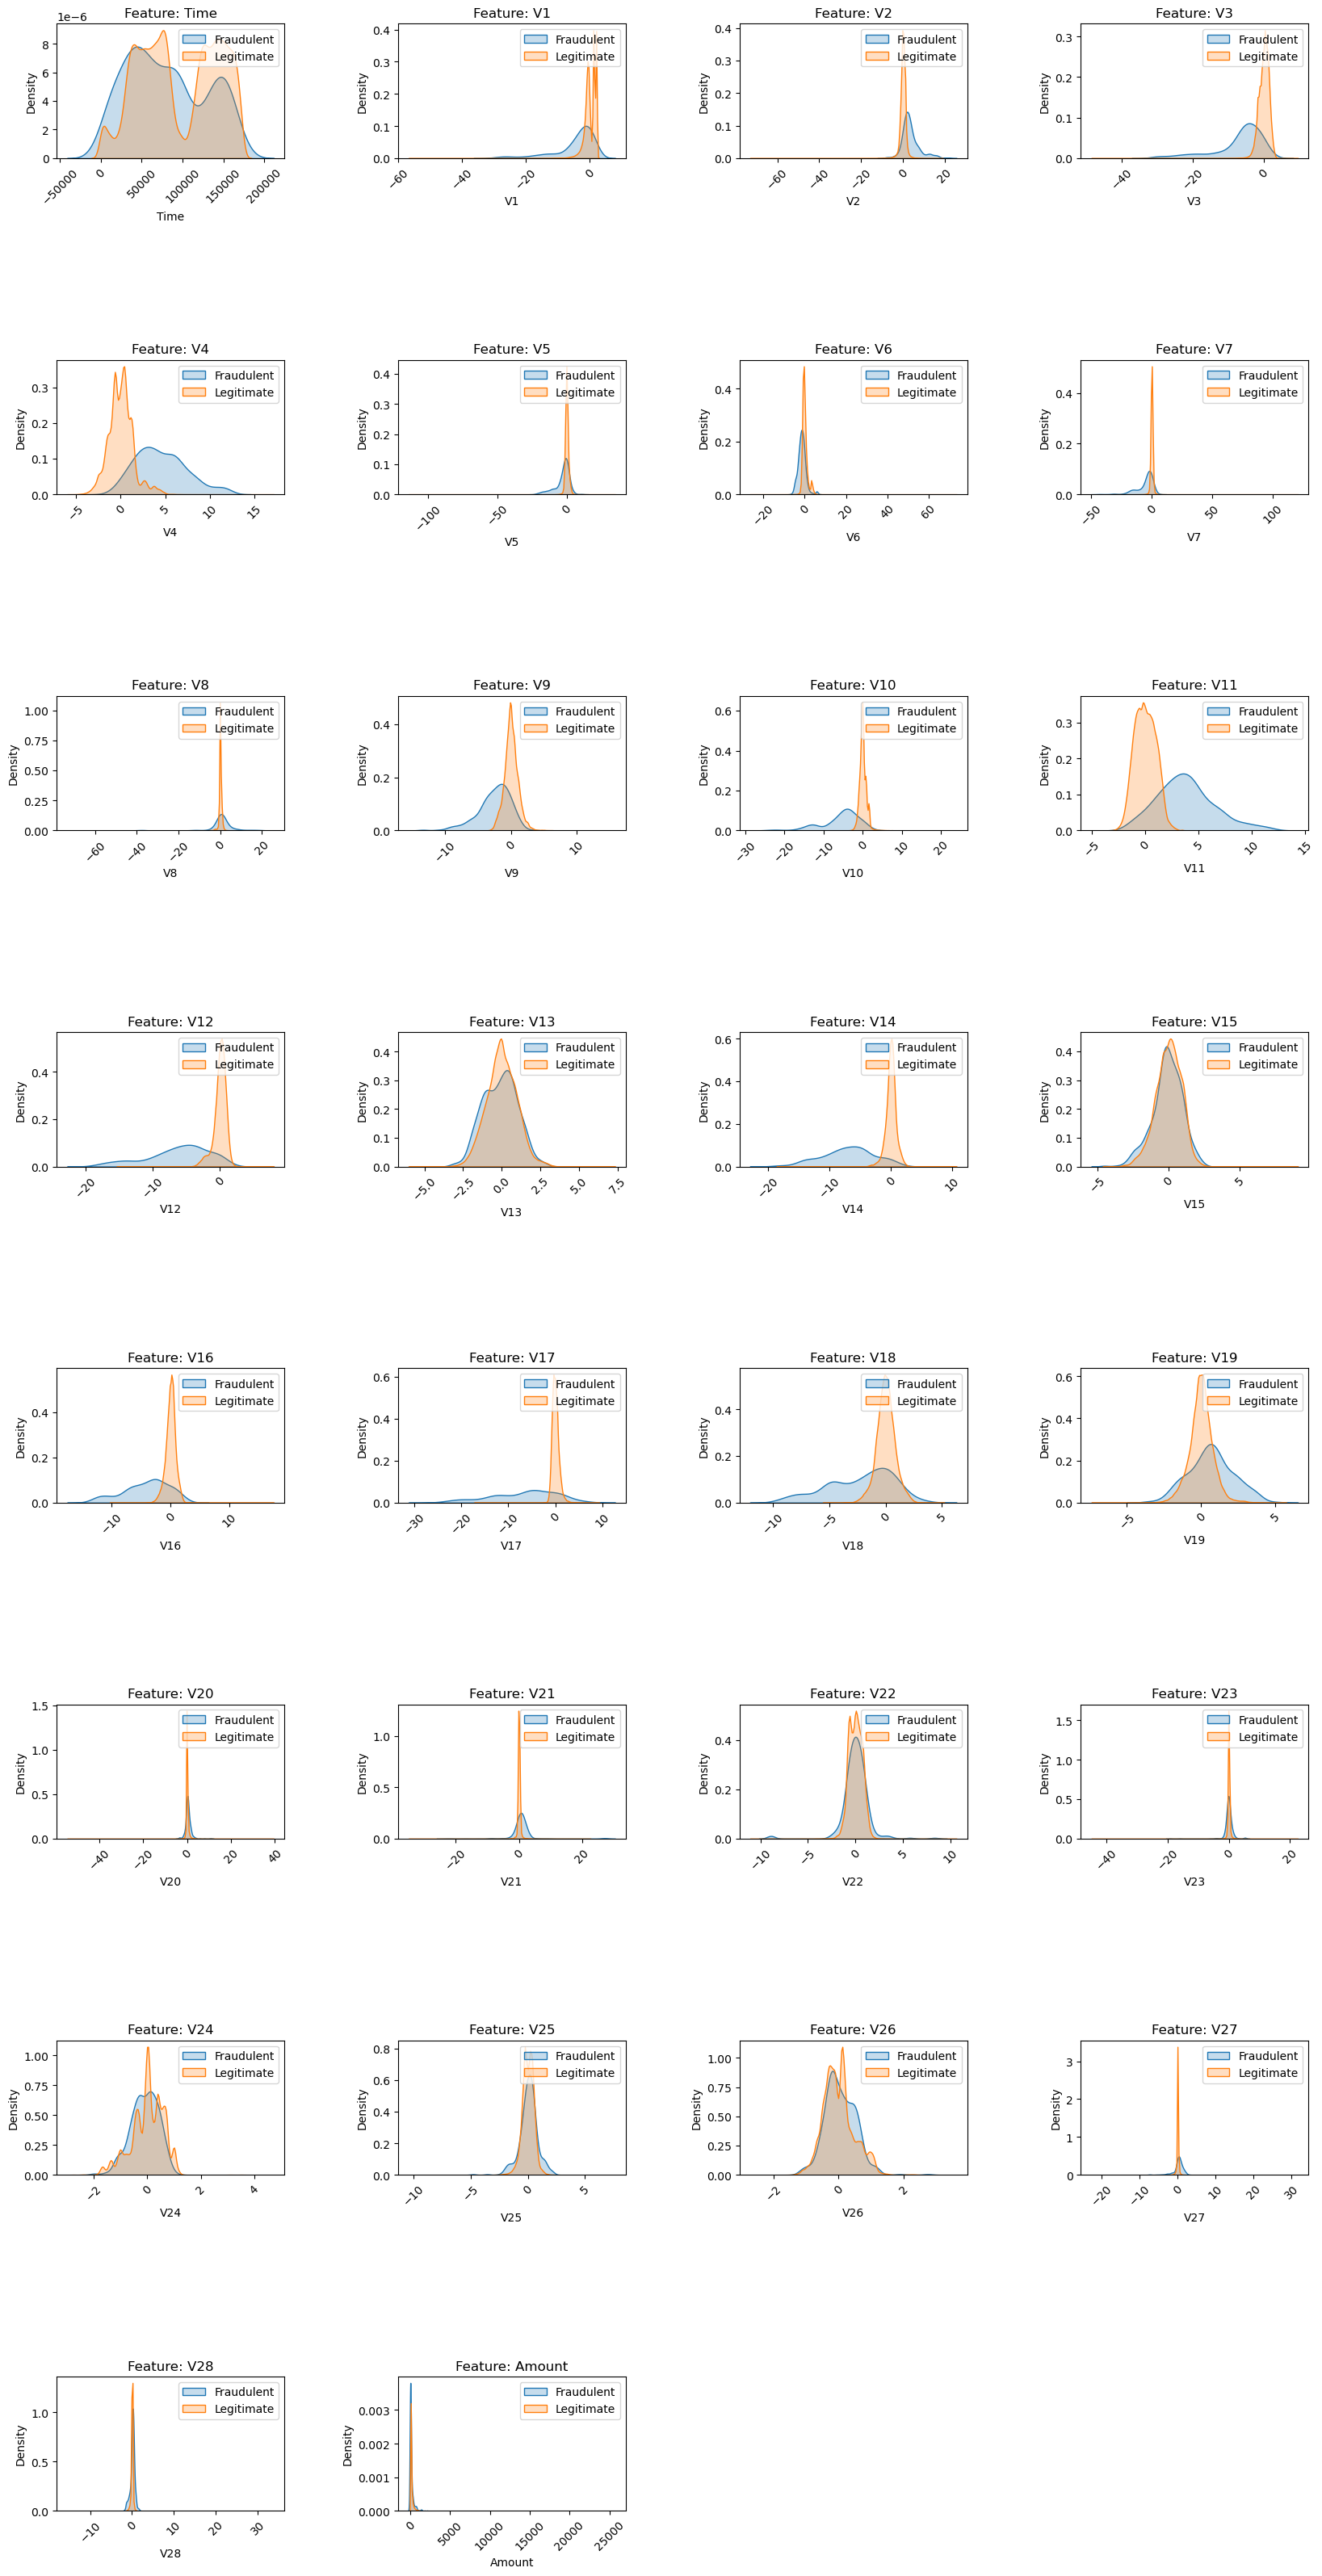

In [10]:
# Drop the 'Class' column and get the remaining features
features = df.drop("Class", axis=1)

# Define the number of columns you want in the plot grid
n_cols = 4
n_features = len(features)
max_rows = 8  # Set a maximum number of rows to avoid an overly large figure
n_rows = min(math.ceil(n_features / n_cols), max_rows)  # Limit the number of rows

# Set up the figure with a larger size for better visibility
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust the width and height as needed
gs = gridspec.GridSpec(n_rows, n_cols)

# Plot each feature's distribution for fraudulent and legitimate transactions
for i, f in enumerate(features[:n_rows * n_cols]):  # Limit to first n_rows * n_cols features
    ax = plt.subplot(gs[i])
    sns.kdeplot(df[f][df["Class"] == 1], label='Fraudulent', fill=True, ax=ax)
    sns.kdeplot(df[f][df["Class"] == 0], label='Legitimate', fill=True, ax=ax)
    ax.set_title(f'Feature: {f}')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Manually adjust the padding
plt.subplots_adjust(hspace=1.5, wspace=0.5)  # Manually adjust the space between plots
plt.show()


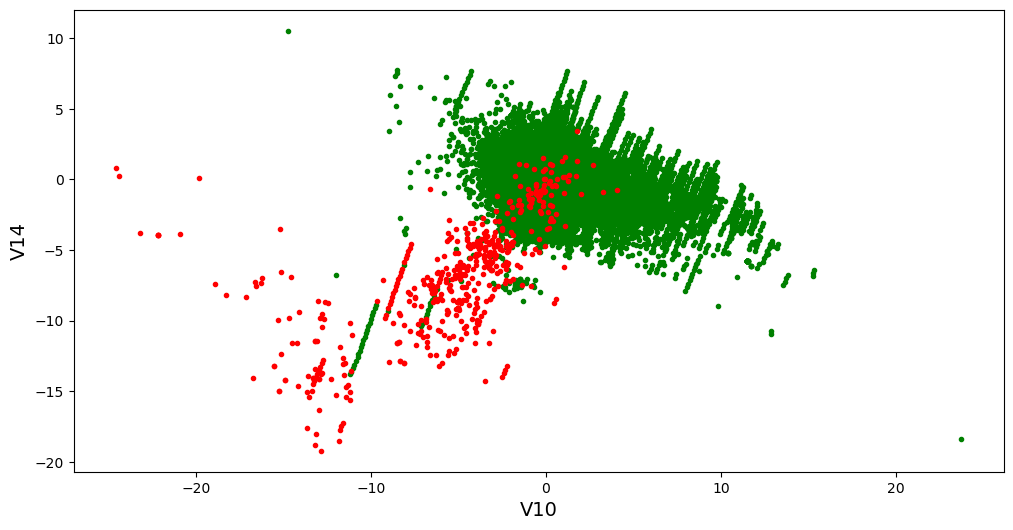

In [11]:
# Graphical representation of two features
plt.figure(figsize=(12, 6))  # Set the figure size
plt.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".")  # Plot legitimate transactions (Class 0) in green
plt.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".")  # Plot fraudulent transactions (Class 1) in red
plt.xlabel("V10", fontsize=14)  # Set the x-axis label to 'V10'
plt.ylabel("V14", fontsize=14)  # Set the y-axis label to 'V14'
plt.show()  # Display the plot


## 3. Data Preparation
For this type of algorithm, it is important that all the data is within a similar range. Therefore, we can apply a scaling or normalization function. Another option is to remove the features that are not within a similar range, as long as they are not very influential for the prediction.

In [12]:
df = df.drop(["Time", "Amount"], axis=1)

## 4. DBSCAN with a Two-Dimensional Dataset
Before starting the DBSCAN training on all the dataset attributes, a test is performed on two attributes to understand how it constructs the decision boundary.

In [13]:
X = df[["V10", "V14"]].copy()
y = df["Class"].copy()

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15, min_samples=13)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=13)

In [15]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker=".", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


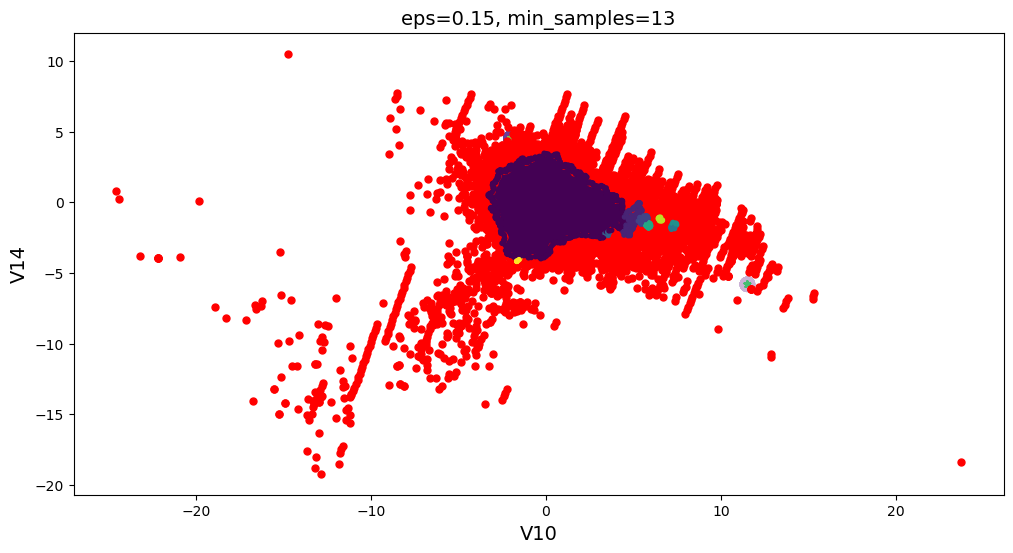

In [16]:
plt.figure(figsize=(12, 6))
plot_dbscan(dbscan, X.values, size=100)
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

In [17]:
counter = Counter(dbscan.labels_.tolist())
bad_counter = Counter(dbscan.labels_[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

Label -1 has 3612 samples - 411 are malicious samples
Label 0 has 280757 samples - 81 are malicious samples
Label 1 has 261 samples - 0 are malicious samples
Label 2 has 50 samples - 0 are malicious samples
Label 3 has 13 samples - 0 are malicious samples
Label 4 has 15 samples - 0 are malicious samples
Label 5 has 13 samples - 0 are malicious samples
Label 6 has 20 samples - 0 are malicious samples
Label 7 has 25 samples - 0 are malicious samples
Label 8 has 16 samples - 0 are malicious samples
Label 9 has 13 samples - 0 are malicious samples
Label 10 has 12 samples - 0 are malicious samples


## 5. Column reduction

In [26]:
X = df.drop("Class", axis=1)
y = df["Class"].copy()

### We apply Column selection with Random Forest







In [19]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X, y)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [24]:
# Choosing the most relevent for our analysis
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [23]:
# Now we reduce the dataset to the 7 most relevant columns
X_reduced = X[list(feature_importances_sorted.head(7).index)].copy()

In [25]:
X_reduced

,V17,V14,V16,V12,V10,V11,V18
0,0.207971,-0.311169,-0.470401,-0.617801,0.090794,-0.551600,0.025791
1,-0.114805,-0.143772,0.463917,1.065235,-0.166974,1.612727,-0.183361
2,1.109969,-0.165946,-2.890083,0.066084,0.207643,0.624501,-0.121359
3,-0.684093,-0.287924,-1.059647,0.178228,-0.054952,-0.226487,1.965775
4,-0.237033,-1.119670,-0.451449,0.538196,0.753074,-0.822843,-0.038195
...,...,...,...,...,...,...,...
284802,1.991691,4.626942,1.107641,2.711941,4.356170,-1.593105,0.510632
284803,-0.025693,-0.675143,-0.711757,0.915802,-0.975926,-0.150189,-1.221179
284804,0.313502,-0.510602,0.140716,0.063119,-0.484782,0.411614,0.395652
284805,0.509928,0.449624,-0.608577,-0.962886,-0.399126,-1.933849,1.113981


## DBS Training with the reduced dataset

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.70, min_samples=25)
dbscan.fit(X_reduced)

DBSCAN(eps=0.7, min_samples=25)

In [29]:
counter = Counter(dbscan.labels_.tolist())
bad_counter = Counter(dbscan.labels_[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

Label -1 has 24588 samples - 445 are malicious samples
Label 0 has 257605 samples - 47 are malicious samples
Label 1 has 980 samples - 0 are malicious samples
Label 2 has 1126 samples - 0 are malicious samples
Label 3 has 75 samples - 0 are malicious samples
Label 4 has 44 samples - 0 are malicious samples
Label 5 has 86 samples - 0 are malicious samples
Label 6 has 26 samples - 0 are malicious samples
Label 7 has 31 samples - 0 are malicious samples
Label 8 has 55 samples - 0 are malicious samples
Label 9 has 25 samples - 0 are malicious samples
Label 10 has 67 samples - 0 are malicious samples
Label 11 has 17 samples - 0 are malicious samples
Label 12 has 46 samples - 0 are malicious samples
Label 13 has 36 samples - 0 are malicious samples


## 6. Evaluating the results

I was careful with imbalanced datasets when using metrics to measure the purity of the clusters. One possible solution is to use techniques for balancing the dataset, such as generating more examples of fraudulent transactions or reducing the number of legitimate transaction examples.

In [30]:
clusters = dbscan.labels_

In [32]:
# Calculating the Purity Score.

print("Purity Score:", purity_score(y, clusters))

Purity Score: 0.9982725143693799


In [35]:
# Calculating the Shiloutte Score.

print("Shiloutte: ", metrics.silhouette_score(X_reduced, clusters, sample_size=10000))

Shiloutte:  0.09884184387850375


In [37]:
# Calculating the Calinski harabasz.

print("Calinski harabasz: ", metrics.calinski_harabasz_score(X_reduced, clusters))

Calinski harabasz:  913.711950589592


## 7. Typical Problems That Can Be Solved with DBSCAN
DBSCAN is useful for solving problems like the one presented below.

In [41]:
#Generating a Dataset

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

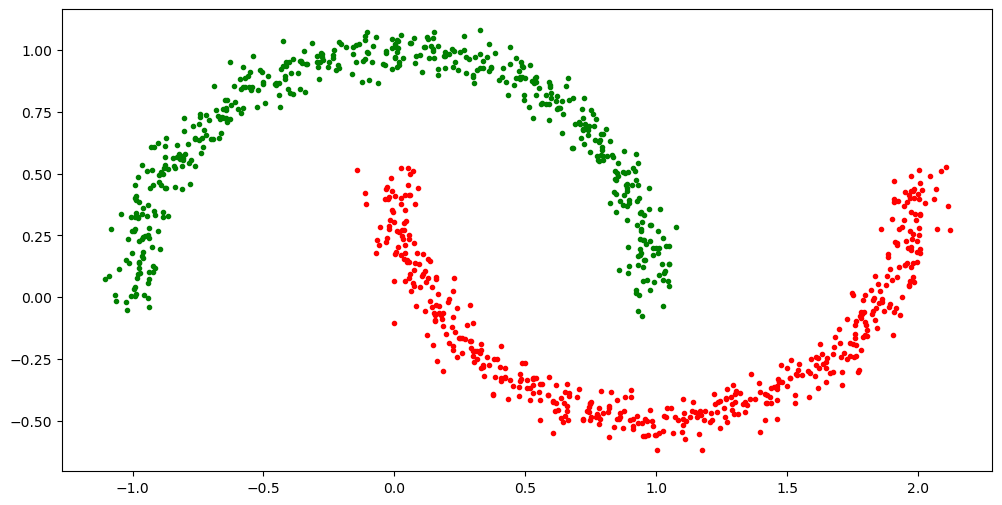

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:,0][y == 0], X[:,1][y == 0], c="g", marker=".")
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], c="r", marker=".")
plt.show()

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.1, min_samples=6)

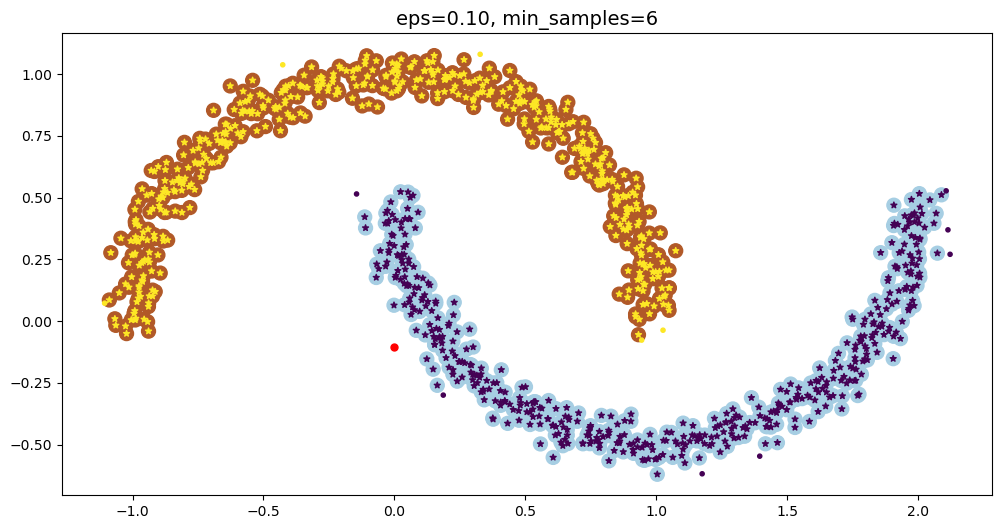

In [45]:
# Representing the Desicion Limit
plt.figure(figsize=(12, 6))
plot_dbscan(dbscan, X, size=100)
plt.show()

In [46]:
counter = Counter(dbscan.labels_.tolist())
bad_counter = Counter(dbscan.labels_[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

Label -1 has 1 samples - 1 are malicious samples
Label 0 has 499 samples - 499 are malicious samples
Label 1 has 500 samples - 0 are malicious samples
